In [62]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

import pdb

root = '../data/openimages'

In [16]:
with open(root + '/annot/class-descriptions.csv', 'r') as f:
    desc = f.readlines()
class_desc = dict([d.strip().split(',', 1) for d in desc])

In [38]:
phase = 'validation'
with open(root + '/annot/{}-annotations-human-imagelabels.csv'.format(phase), 'r') as f:
    meta = f.readlines()
meta = [m.split(',') for m in meta[1:]]
valid = np.where(np.array([m[3] for m in meta]))[0]
meta_valid = [meta[v] for v in valid]
meta_dict = {}
for m in meta_valid:
    if m[0] not in meta_dict.keys():
        meta_dict[m[0]] = [m[2]]
    else:
        meta_dict[m[0]].append(m[2])
ids = sorted(meta_dict.keys())

In [73]:
# load EfficientNet model
model = EfficientNet.from_pretrained('efficientnet-b5')
model.eval()
labels_map = json.load(open('../examples/simple/labels_map.txt'))
def predict(img):
    tfms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
    img = tfms(img).unsqueeze(0)
    with torch.no_grad():
        outputs = model(img)
    ret= ''
    for idx in torch.topk(outputs, k=5).indices.squeeze(0).tolist():
        prob = torch.softmax(outputs, dim=1)[0, idx].item()
        ret += '{label:<75}\n'.format(label=labels_map[str(idx)], p=prob*100)
    return ret

Loaded pretrained weights for efficientnet-b5


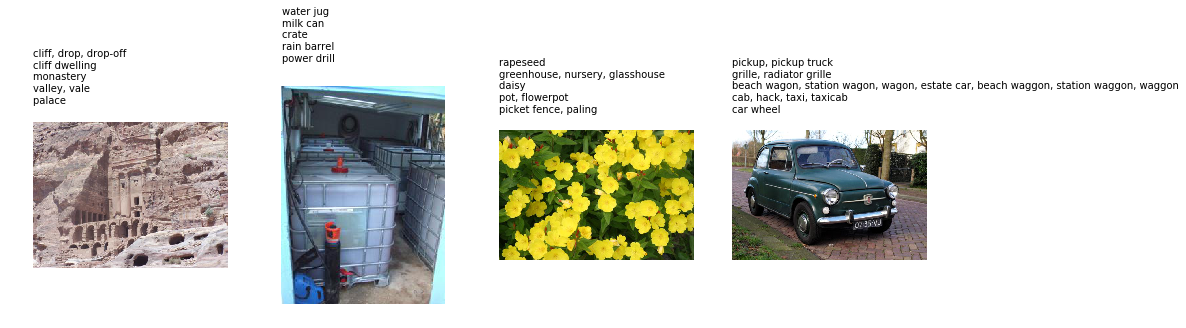

In [75]:
num = 4
cols = 4
rows = int(np.ceil(num / cols))
sel_type = 'random'

if sel_type == 'sequential':
    start = 0
    stride = 1
    selidx = np.arange(start, start + stride *  num, stride)
else:
    selidx = np.random.permutation(len(ids))[:num]

plt.figure(figsize=(cols * 4, rows * 4))

for i in range(num):
    if phase == 'validation':
        img = Image.open(root + '/images/validation/{}.jpg'.format(ids[selidx[i]]))
    else:
        if os.path.isfile(root + '/images/train_part1/{}.jpg'.format(ids[selidx[i]])):
            img = Image.open(root + '/images/train_part1/{}.jpg'.format(ids[selidx[i]]))
        else:
            img = Image.open(root + '/images/train_part2/{}.jpg'.format(ids[selidx[i]]))
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.text(0, -20, predict(img))
plt.show()

In [76]:
len(ids)

41620

In [50]:
[[class_desc[m] for m in meta_dict[ids[i]]] for i in selidx]

[['Wheel',
  'Tire',
  'Race track',
  'Electrical network',
  'Formula one',
  'Indycar series',
  'Motorsport',
  'Race of champions',
  'Formula racing',
  'Race',
  'Sports',
  'Stock car racing',
  'Vehicle',
  'Sport venue',
  'Racing',
  'Car',
  'Auto racing',
  'Race car'],
 ['Couch',
  'Human leg',
  'Human hair',
  'Human arm',
  'Studio couch',
  'Pillow',
  'Bed',
  'Bed sheet',
  'Room',
  'Furniture',
  'Textile',
  'Bed frame',
  'Duvet cover'],
 ['Human body',
  'Church',
  'Pipe organ',
  'Organ',
  'Musical instrument',
  'Keyboard',
  'Organ pipe',
  'Cathedral',
  'Altar'],
 ['Human hair',
  'Mammal',
  'Plant',
  'Clothing',
  'Human arm',
  'Sports car',
  'Luxury vehicle',
  'Land vehicle',
  'Sedan',
  'Pontiac g8',
  'Bumper',
  'Compact car',
  'Rim',
  'Automotive design',
  'Vehicle',
  'Wheel',
  'Automotive exterior',
  'Car',
  'Race car']]